In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [2]:
# Dependencies
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [3]:
import tensorflow
tensorflow.keras.__version__

'2.4.0'

In [4]:
weather = pd.read_csv('../sonomavalley.csv')
weather.head()

,Unnamed: 0,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,MarchCloudiness,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
0,5,Iron Horse,2009,91,Sebastopol,49.903226,71.322581,63.258065,2.3,46.354839,...,47.129032,4.2,69.258065,87.322581,41.483871,55.516129,50.225806,5.1,67.419355,81.774194
1,6,Novy,2009,87,Healdsburg,41.548387,60.677419,53.193548,5.7,26.129032,...,75.903226,0.0,2.580645,52.064516,55.451613,82.838710,73.935484,0.1,4.967742,54.612903
2,7,Iron Horse,2010,92,Sebastopol,52.935484,72.419355,64.903226,5.5,42.741935,...,46.677419,1.9,74.161290,90.483871,36.548387,50.032258,44.806452,7.8,79.741935,91.290323
3,8,Iron Horse,2011,91,Sebastopol,50.806452,68.451613,61.677419,2.7,56.064516,...,46.225806,1.5,75.258065,90.096774,39.774194,56.580645,50.258065,4.2,65.741935,86.258065
4,9,River Road,2011,84,Guttenberg,32.451613,44.290323,39.580645,8.6,40.838710,...,79.354839,6.6,20.387097,77.645161,67.225806,80.935484,75.419355,18.6,24.741935,79.451613


In [5]:
weatherClean=weather.drop("Unnamed: 0", axis=1)
weatherClean.head()

,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,MarchCloudiness,MarchHumidity,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
0,Iron Horse,2009,91,Sebastopol,49.903226,71.322581,63.258065,2.3,46.354839,71.225806,...,47.129032,4.2,69.258065,87.322581,41.483871,55.516129,50.225806,5.1,67.419355,81.774194
1,Novy,2009,87,Healdsburg,41.548387,60.677419,53.193548,5.7,26.129032,70.935484,...,75.903226,0.0,2.580645,52.064516,55.451613,82.838710,73.935484,0.1,4.967742,54.612903
2,Iron Horse,2010,92,Sebastopol,52.935484,72.419355,64.903226,5.5,42.741935,72.870968,...,46.677419,1.9,74.161290,90.483871,36.548387,50.032258,44.806452,7.8,79.741935,91.290323
3,Iron Horse,2011,91,Sebastopol,50.806452,68.451613,61.677419,2.7,56.064516,79.483871,...,46.225806,1.5,75.258065,90.096774,39.774194,56.580645,50.258065,4.2,65.741935,86.258065
4,River Road,2011,84,Guttenberg,32.451613,44.290323,39.580645,8.6,40.838710,78.548387,...,79.354839,6.6,20.387097,77.645161,67.225806,80.935484,75.419355,18.6,24.741935,79.451613


In [6]:
# Data Pre-Processing

In [7]:
weatherClean.columns

Index(['winery', 'vintage', 'points', 'cities', 'MarchLowTemp',
       'MarchHighTemp', 'MarchAvgTemp', 'MarchPrecip', 'MarchCloudiness',
       'MarchHumidity', 'AprilLowTemp', 'AprilHighTemp', 'AprilAvgTemp',
       'AprilPrecip', 'AprilCloudiness', 'AprilHumidity', 'MayLowTemp',
       'MayHighTemp', 'MayAvgTemp', 'MayPrecip', 'MayCloudiness',
       'MayHumidity', 'JuneLowTemp', 'JuneHighTemp', 'JuneAvgTemp',
       'JunePrecip', 'JuneCloudiness', 'JuneHumidity', 'JulyLowTemp',
       'JulyHighTemp', 'JulyAvgTemp', 'JulyPrecip', 'JulyCloudiness',
       'JulyHumidity', 'AugLowTemp', 'AugHighTemp', 'AugAvgTemp', 'AugPrecip',
       'AugCloudiness', 'AugHumidity'],
      dtype='object')

In [8]:
weatherCleandf = weatherClean.drop(['winery', 'vintage', 'cities'], axis=1)

In [9]:
# Given the set of values for features, we have to predict the quality of wine. 
# Find correlation of each feature with our target variable 'points'

correlations = weatherCleandf.corr()['points'].drop('points')
print(correlations)

MarchLowTemp       0.267432
MarchHighTemp      0.326344
MarchAvgTemp       0.315861
MarchPrecip       -0.641284
MarchCloudiness    0.113542
MarchHumidity     -0.077603
AprilLowTemp       0.109521
AprilHighTemp      0.156651
AprilAvgTemp       0.136840
AprilPrecip       -0.467928
AprilCloudiness    0.085131
AprilHumidity     -0.001695
MayLowTemp        -0.177539
MayHighTemp       -0.281165
MayAvgTemp        -0.271262
MayPrecip         -0.231374
MayCloudiness      0.245155
MayHumidity        0.220177
JuneLowTemp       -0.322015
JuneHighTemp      -0.422658
JuneAvgTemp       -0.414925
JunePrecip         0.122181
JuneCloudiness     0.406817
JuneHumidity       0.400452
JulyLowTemp       -0.412540
JulyHighTemp      -0.524959
JulyAvgTemp       -0.508712
JulyPrecip        -0.049325
JulyCloudiness     0.481854
JulyHumidity       0.548563
AugLowTemp        -0.373230
AugHighTemp       -0.494952
AugAvgTemp        -0.462123
AugPrecip         -0.382850
AugCloudiness      0.420231
AugHumidity        0

In [10]:
X = weatherCleandf.drop(['points'], axis=1)
y = weatherCleandf['points']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [12]:
# Fit linear regression to training data
model = LinearRegression()
model.fit(X_train,y_train)
  
# This gives the coefficients of the features selected above.  
print(model.coef_)

[-0.01914649 -0.00840086  0.00656432 -0.04100808 -0.00438906 -0.07672672
  0.02201655  0.06413481 -0.03641123 -0.00075927 -0.09859359 -0.0498596
 -0.01587847 -0.02227443 -0.02292732 -0.01983146 -0.07571643  0.0232367
  0.05942027  0.00181828 -0.02898197  0.0313035  -0.06385041  0.02900266
 -0.05610665  0.01230164 -0.03804265  0.00248082  0.09538588 -0.0400729
 -0.04057001  0.02333685  0.00943638 -0.05422943  0.05644255  0.07112111]


In [13]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: -0.06724700942038919


Text(0.5, 1.0, 'Residual Plot')

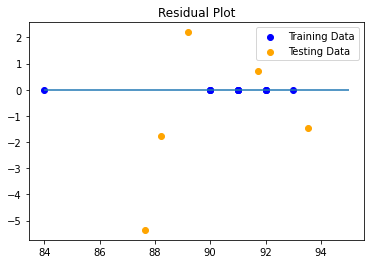

In [15]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [14]:
train_pred = model.predict(X_train)
print(train_pred)
test_pred = model.predict(X_test) 
print(test_pred)

[90. 91. 91. 92. 92. 91. 84. 93. 90. 90. 91. 92.]
[91.71993345 89.19636951 93.54598196 88.22739207 87.64499866]
